In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [9]:
# step1:dataset
years=np.array([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025]).reshape(-1,1)
solar_capacity=np.array([0.1,0.2,0.5,1.0,10,100,165,230,546,1018,1200,1329,1500,2800,17000,22000])  #Megawatt
# the method .reshape(-1, 1) is used to change the shape of an array.
# -1: This tells NumPy to automatically calculate the number of rows based on the length of the array.
# 1: This means 1 column.
# You usually use .reshape(-1, 1) when:
# You need to make your array 2D with one column, like for machine learning models (e.g., scikit-learn).
# You want to concatenate arrays column-wise.
# You need to make your array compatible with another 2D array.
# .reshape(-1, 1) → turns a 1D array into a column vector
# .reshape(1, -1) → turns a 1D array into a row vector
# if I remove .reshape(-1,1) then I don't need to use flatten


In [10]:
# convert to dataframe
df=pd.DataFrame({'Years':years.flatten(),'Solar_Capacity_MW':solar_capacity})
# why we use flatten here:Many people use flatten() as a safe habit when they are not sure if the array is 1D or 2D, especially if it's created via NumPy functions like reshape(), loadtxt(), or meshgrid() that might return a 2D structure.
# In some machine learning or scientific computation pipelines, the shape may accidentally end up being (n,1) even though it looks 1D. Using .flatten() ensures it works without error in DataFrame or plotting.
# If your years variable is already a 1-dimensional array or list, then you don’t need .flatten(). It’s only necessary if years is a 2D array


In [11]:
# show result
df

,Years,Solar_Capacity_MW
0,2010,0.1
1,2011,0.2
2,2012,0.5
3,2013,1.0
4,2014,10.0
5,2015,100.0
6,2016,165.0
7,2017,230.0
8,2018,546.0
9,2019,1018.0


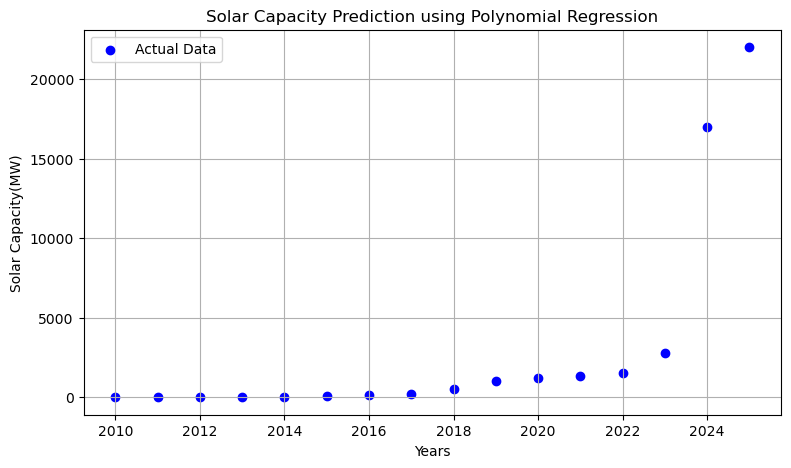

In [12]:
# step6 visualization
plt.figure(figsize=(9,5))
plt.scatter(years,solar_capacity,color='blue',label='Actual Data')
plt.title(f"Solar Capacity Prediction using Polynomial Regression")
plt.xlabel('Years')
plt.ylabel('Solar Capacity(MW)')
plt.grid(True)
plt.legend()
plt.show()
# plt.scatter humy batay ga k graph kis shape(linear ya polynomial) ka hai aor us pr kon sa model lagy ga ,linear ya polynomial

In [13]:
# step 3:split data into train and test set
x_train,x_test,y_train,y_test=train_test_split(years,solar_capacity,test_size=0.2,random_state=42)
# This sets the random seed for reproducibility. If you run the code multiple times, you'll get the same split every tim

In [14]:
# step2:polynomial feature transformation
degree=4    #try 3,4,5 to compare
poly=PolynomialFeatures(degree=degree)
x_poly=poly.fit_transform(years)
# Degree	     Pros     	                                Cons
# 3	     Simpler, less prone to overfitting	           Might underfit if the trend is complex
# 4	     Good balance for moderately complex trends	    Slight risk of overfitting
# 5	     Captures very complex patterns	                May overfit, especially on small datasets

In [15]:
# step3:train model
model=LinearRegression()
model.fit(x_poly,solar_capacity)

LinearRegression()

In [16]:
# step4:predict
solar_pred=model.predict(x_poly)

In [18]:
# example predict for user input year
input_year=int(input('Enter year for prediction(eg.2026):'))
# step1:convert input to array and reshape
input_array=np.array([[input_year]])
# step2:transform input with same polynmial transformer
input_poly=poly.transform(input_array)
# step3: predict using trained model
predicted_capacity=model.predict(input_poly)
# step4:output
print(f'predicted solar capacity in {input_year}:{predicted_capacity[0]:.2f} MW')

Enter year for prediction(eg.2026): 2035


predicted solar capacity in 2035:227357.77 MW


In [19]:
# step5 evaluation
mse=mean_squared_error(solar_capacity,solar_pred)
r2=r2_score(solar_capacity,solar_pred)
print(f'polynomial degree:{degree}')
print(f'mean squared error:{mse:.2f}')
print(f'R square score:{r2:.4f}')
# r square 1 ky nazdeek ho tu model best fit hota hai
# Lower MSE = Better fit on training data.

# Lekin agar degree zyada ho, toh MSE training par toh kam ho jaata hai, test data par badh bhi sakta hai (overfitting).

# Degree	MSE (Train)    	MSE (Test)	   Explanation
# 3	           Medium	      Medium	Balanced fit
# 4         	Lower	Slightly higher/lower	Zyada flexible
# 5         	Lowest	Might increase	Overfitting ka chance
# R² = 1 means perfect prediction.

# R² score training par barhta hai with higher degrees.

# Test par kabhi kabhi ghat bhi sakta hai agar model overfit kare.

# Degree	R² (Train)	R² (Test)	Explanation
# 3       	0.98–0.99	0.95–0.97	Good fit
# 4        	0.99+	0.94–0.96	Might slightly overfit
# 5     	~1.00	0.90–0.95	High overfitting risk

polynomial degree:4
mean squared error:4153427.56
R square score:0.8969


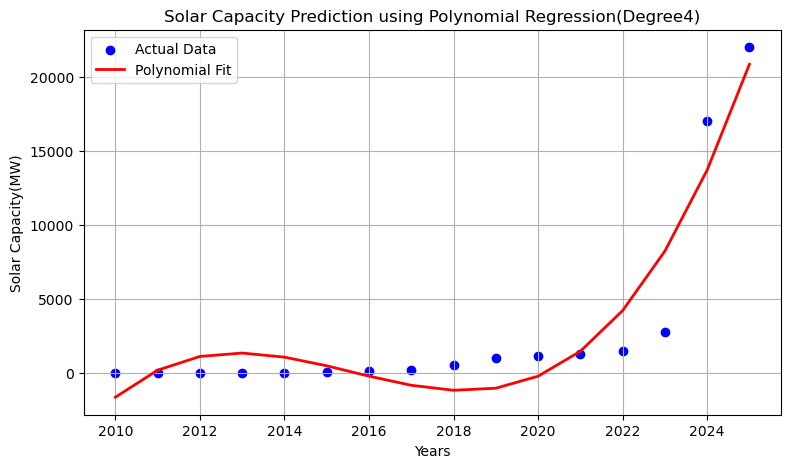

In [20]:
# step6 visualization
plt.figure(figsize=(9,5))
plt.scatter(years,solar_capacity,color='blue',label='Actual Data')
plt.plot(years,solar_pred,color='red',linewidth=2,label='Polynomial Fit')
plt.title(f"Solar Capacity Prediction using Polynomial Regression(Degree{degree})")
plt.xlabel('Years')
plt.ylabel('Solar Capacity(MW)')
plt.grid(True)
plt.legend()
plt.show()